### To pratice feature engineering on House Prices Dataset

Data taken from https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

There are 1460 instances of training data. 
Total number of attributes are 81 which 36 is quantitative, 43 categorical, Id and SalePrice. 

#### Quantitative: 
1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

#### Qualitative: 
Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

### Data Exploration 

In [147]:
# Load Libraries 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [148]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline 

# Limiting floats output to 2 decimal points
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) 

In [149]:
# Use Bayesian style method 
plt.style.use('bmh')

In [150]:
# Load train data into dataframe 
train = pd.read_csv('D:/Users/452374/train.csv')

# Get the original dimension of the dataframe 
print("Train data size before dropping Id features is {} ".format(train.shape))

# Remove the Id column  which is unnecessary for prediction process
del train['Id']

# Get the latest dimension of the dataframe 
print("Train data size after dropping Id features is {} ".format(train.shape))

# Display the first 5 rows of the train dataset 
train.head() 

Train data size before dropping Id features is (1460, 81) 
Train data size after dropping Id features is (1460, 80) 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [151]:
# Display all info of the data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Analysis of Target Variable 

#### SalePrice is the variable need to be predicted.

In [152]:
# Get descriptive statistics summary on SalePrice 
print(train['SalePrice'].describe())

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64



 mu = 180921.20 and sigma = 79415.29



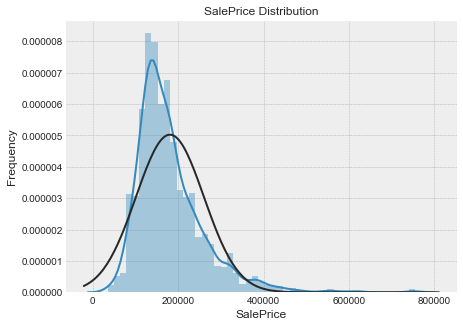

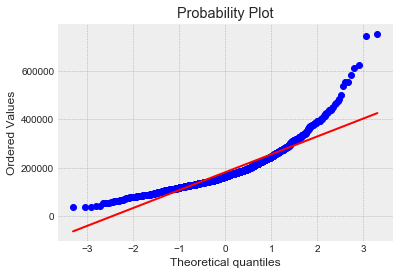

In [153]:
# Check how the housing price if it is distributed
plt.figure(figsize=(7,5))

# Plot histogram
sns.distplot(train['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Label y-axis
plt.ylabel('Frequency')
plt.title('SalePrice Distribution', fontsize=12);

# Get the QQ-plot 
fig = plt.figure() 
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [154]:
# Check the skewness and kurtosis 
print("Skewness: %f" %df['SalePrice'].skew())

# Kurtosis is the degree of peakness 
print("Kurtosis: %f" %df['SalePrice'].kurt())

#Skewness and kurtosis are not really useful

Skewness: 1.882876
Kurtosis: 6.536282


#### The target variable is right skewed and some outliers lie about ~500000. 
Thus, we need to transform the variable to make it more normally distributed. 

### Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



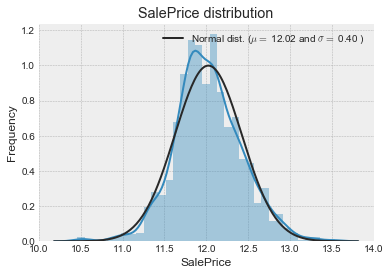

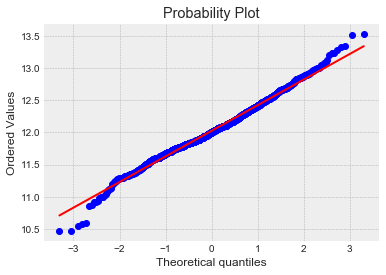

In [155]:
# Use numpy function log1p = log(1+x) to all elements of the column
train['SalePrice'] = np.log1p(train['SalePrice'])

# Get the new distribution 
sns.distplot(train['SalePrice'],fit=norm)

# Get the fitted parameter used by function 
(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))
# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
# Label
plt.ylabel('Frequency')
plt.title('SalePrice distribution');

# Get the QQ plot 
fig = plt.figure() 
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

#### The skew is almost normally distributed 

### Feature Engineering 

### Dealing with missing values

Some features might not be relevant in the analysis as too much missing values (such as PoolQC). 
It is better to concentrate on features that give real insights

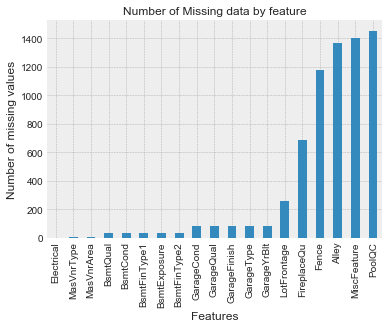

In [156]:
# 01 Use bar chart to visualize the variables with missing value 
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True) # Dataframe holds sorted values 
missing.plot.bar()

# Labelling
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Number of Missing data by feature',fontsize=12);

In [172]:
#02 Get the missing values ratio by feature 

# Get the total of missing values by feature 
missing_data = (train.isnull().sum()/len(train))*100
# Drop the features that do not have missing values 
missing_data = missing_data.drop(missing_data[missing_data== 0].index).sort_values(ascending=False)[:30]

missing_ratio = pd.DataFrame({'Missing Ratio' :missing_data})

missing_ratio.head(20)

,Missing Ratio
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageType,5.55
GarageFinish,5.55
GarageQual,5.55


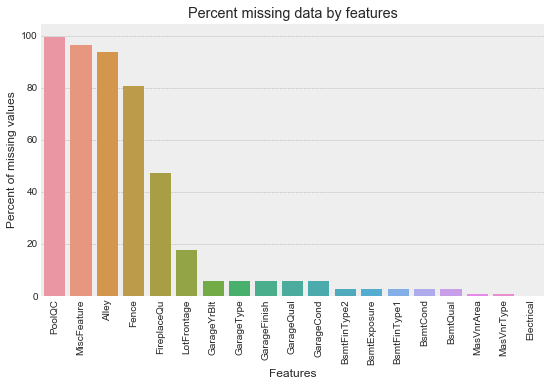

In [189]:
f, ax = plt.subplots(figsize=(9,5))
plt.xticks(rotation = '90')
sns.barplot(x=missing_data.index, y=missing_data)
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Percent missing data by features');

In [65]:
# Remove features with 30% or less Na values 
# NaN values means lack of subject described by attribute like missing pool, fence, no garage and basement 

df = train[[column for column in train if train[column].count()/len(train)>=0.3]]

print("List of dropped columns:" , end="")
for c in train.columns: 
    if c not in df.columns:
        print(c, end=", ") 
print('\n')

train = df

# Get the latest dimension of the dataframe 
print("Train data size after dropping Id features is {} ".format(train.shape))


List of dropped columns:Alley, PoolQC, Fence, MiscFeature, 

Train data size after dropping Id features is (1460, 76) 


### Numerical Data Distribution 

In [190]:
# Check the data types in the data
list(set(train.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [191]:
# Select only the data with numeric data types 
df_num = train.select_dtypes(include = ['float64','int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,...,0,61,0,0,0,0,0,2,2008,12.25
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,...,298,0,0,0,0,0,0,5,2007,12.11
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,...,0,42,0,0,0,0,0,9,2008,12.32
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,...,0,35,272,0,0,0,0,2,2006,11.85
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,...,192,84,0,0,0,0,0,12,2008,12.43


In [192]:
# Get the dimension of the dataframe that only contains numeric values
df_num.shape

(1460, 37)

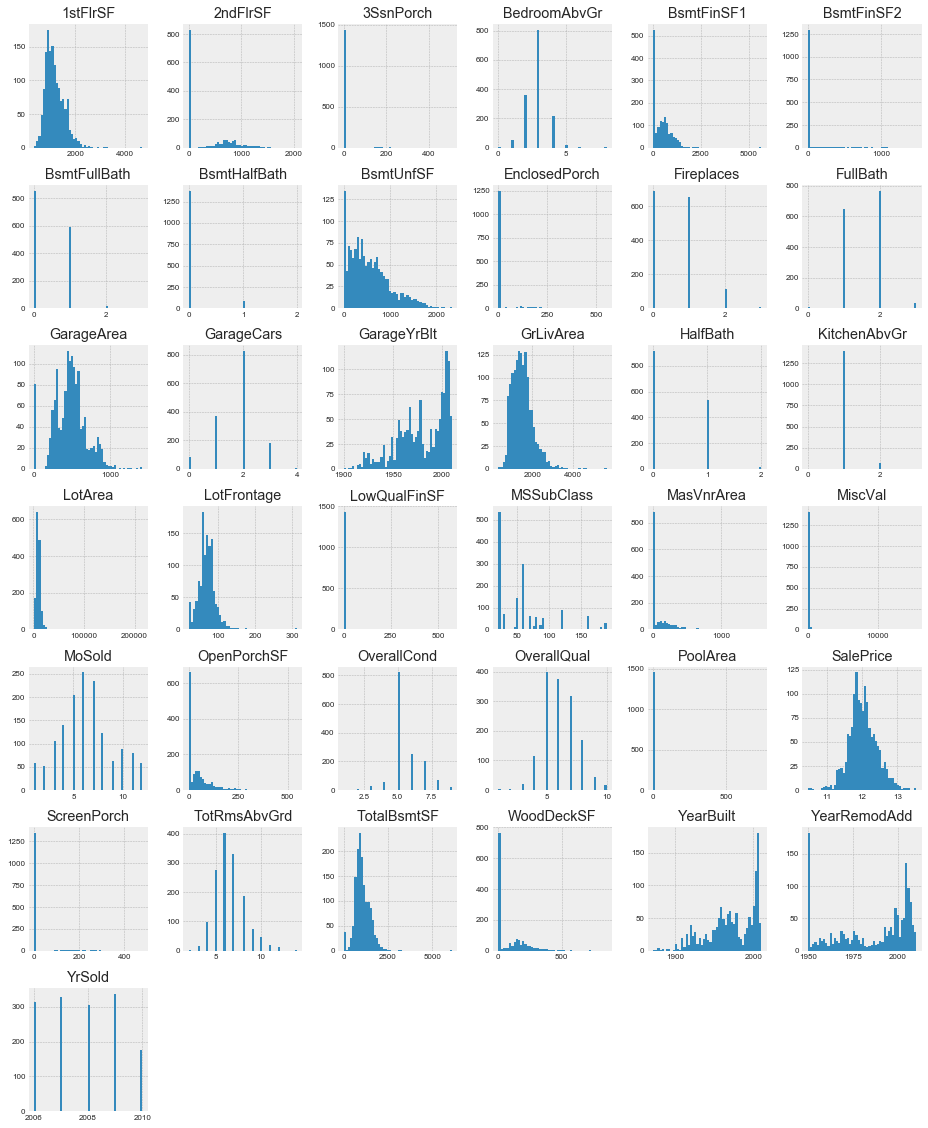

In [193]:
# 
df_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8); 
# ; avoid having the matplotlib verbose informations 

In [ ]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

#### Conclusion: 
Featues such as '1stFlrSF','TotalBsmtSF','LotFrontage','GrLiveArea' seem to have similar distribution to the one have in 'SalePrice'. Therefore, let's see correlation

### Data Correlation 

In [131]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending = False)
print ("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list),golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


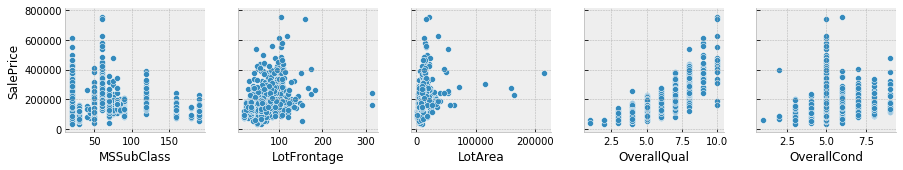

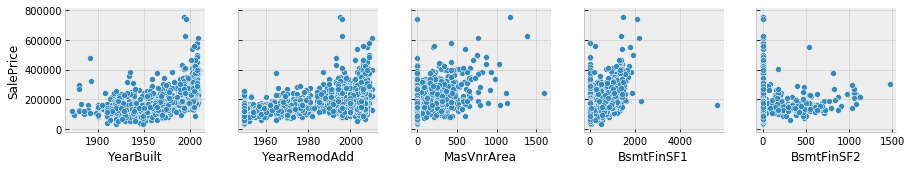

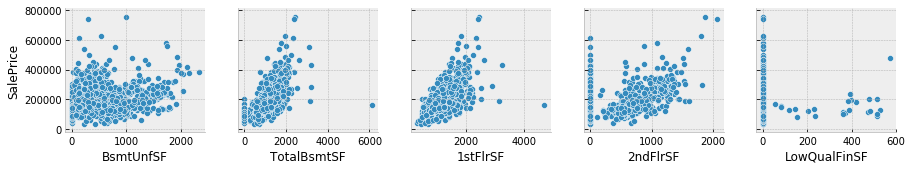

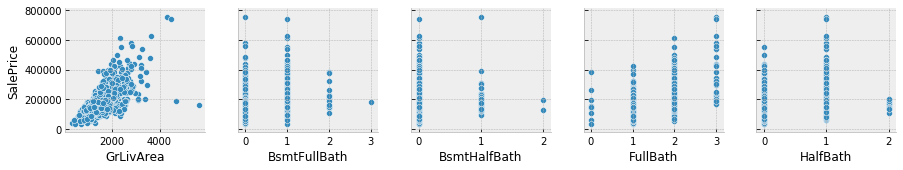

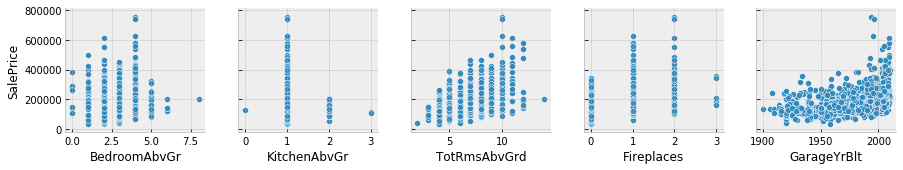

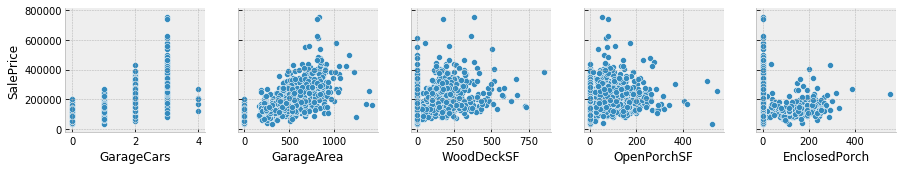

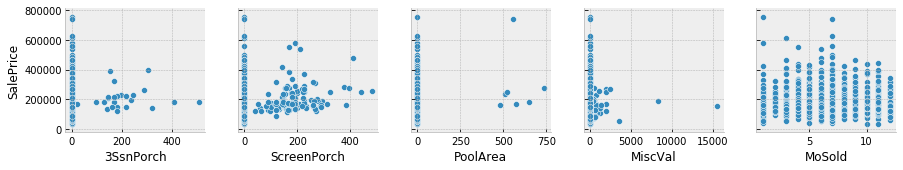

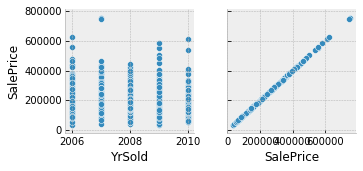

In [132]:
# Relationships such as curvilinear relationship 
# cannot be guessed by looking at the correlation value 
# Take the features that is excluded from correlation table 
# and plot to see if they show some kind of pattern 

for i in range(0,len(df_num.columns),5): 
    sns.pairplot(data =df_num, x_vars=df_num.columns[i:i+5], 
                y_vars=['SalePrice'])

In [133]:
# Remove 0 values 
# Repeat the process of finding correlated values 

In [134]:
import operator 

individual_features_df = []

for i in range (0,len(df_num.columns)-1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i],'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] !=0]
    individual_features_df.append(tmpDf)
    
all_correlations = {feature.columns[0]:feature.corr()['SalePrice'][0] 
                    for feature in individual_features_df}

all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key,value) in all_correlations: 
    print("{:>15}: {:>15}".format(key,value))

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967

In [135]:
# Get the golden_features_list 
golden_features_list = [key for key, value in all_correlations 
                        if abs(value)>=0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list),golden_features_list ))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


#### Feature to feature relationship

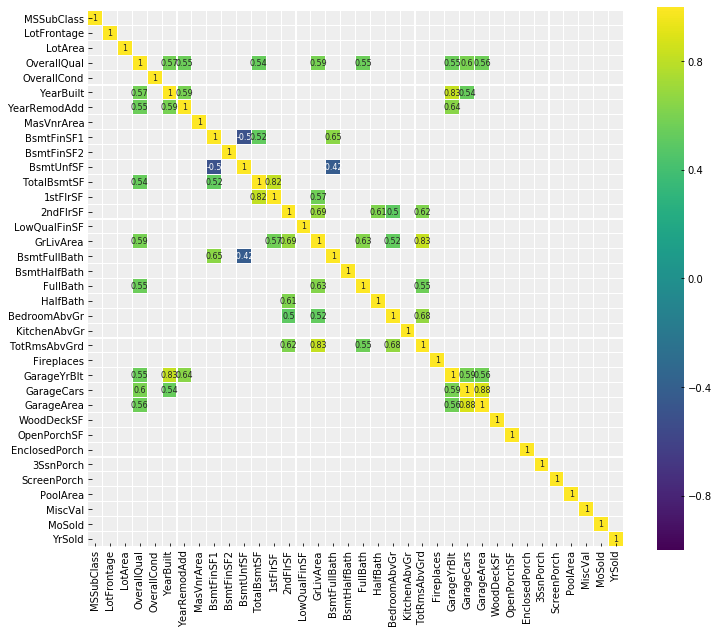

In [136]:
# Try to see some variables are linked between each other 

# Drop as the SalePrice correlation is examine
corr = df_num.drop('SalePrice',axis=1).corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr>=0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True,
            annot_kws={"size":8},square=True);

Some of the features may be combined between each other in order to reduce the number of features

### Q -> Q (Quantitative to Quantitative relationship)

In [137]:
# Some of the features are categorical
# Separate categorical from quantitative features 

quantitative_features_list= ['LotFrontage','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                             'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                             'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                             'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                             'ScreenPorch','PoolArea','MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,65.0,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,80.0,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,68.0,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,60.0,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,84.0,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [119]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative_values = df[quantitative]
quantitative_values.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [138]:
# Analyse the strong correlated quantitative features 

features_to_analyse = [x for x in quantitative_features_list 
                       if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse 

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

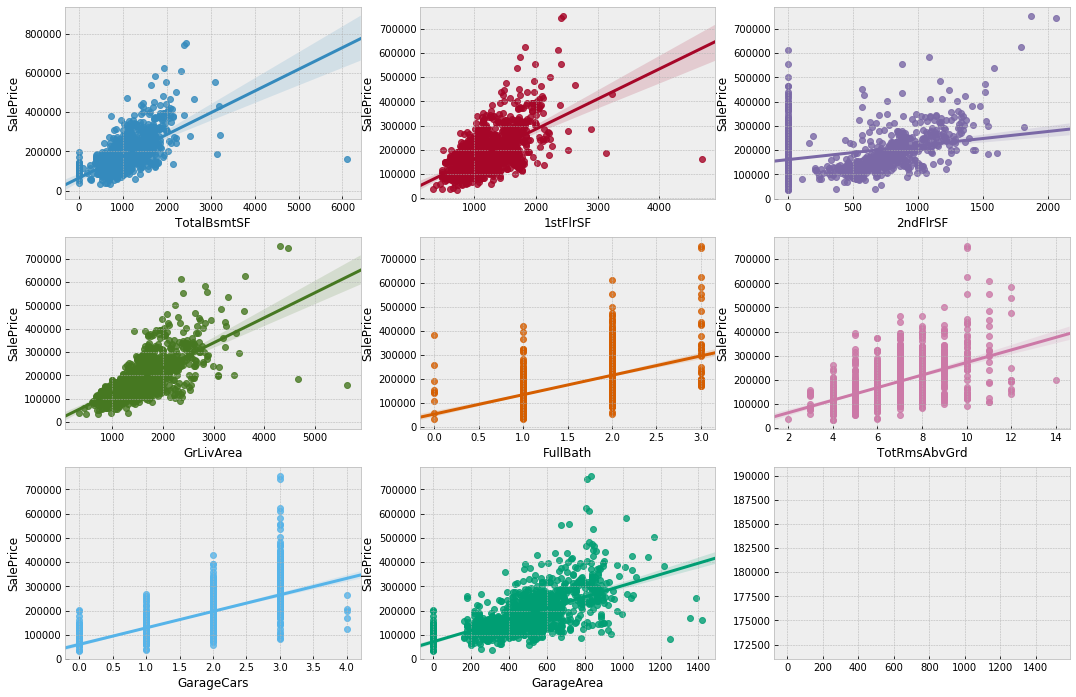

In [139]:
fig, ax = plt.subplots(round(len(features_to_analyse)/3), 3, figsize = (18,12))

for i , ax in enumerate(fig.axes): 
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y="SalePrice", data=df[features_to_analyse], ax=ax)

### C -> Q (Categorical to Quantitative relationship)

In [140]:
# Instead of checking from the features list,
# just remove the quantitave list from the dataframe 

categorical_features = [a for a in quantitative_features_list[:-1] 
                        + df.columns.tolist() if (a not in quantitative_features_list[:-1])
                        or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [141]:
df_not_num = df_categ.select_dtypes(include=['O'])
print('There is {} non numerical features inclduing:\n{}'.format(len(df_not_num.columns),
                                                                 df_not_num.columns.tolist()))

There is 39 non numerical features inclduing:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

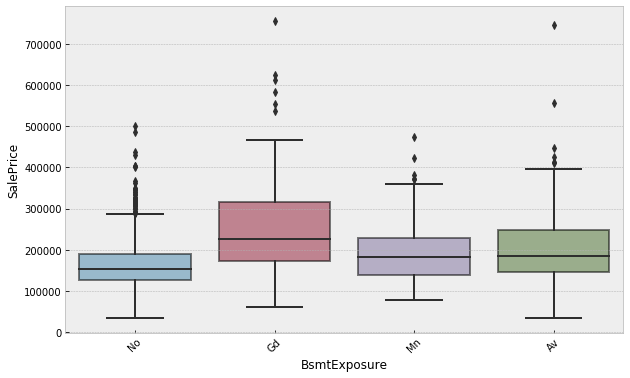

In [142]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x='BsmtExposure',y='SalePrice',data=df_categ)
plt.setp(ax.artists, alpha=.5 , linewidth=2, edgecolor='k')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

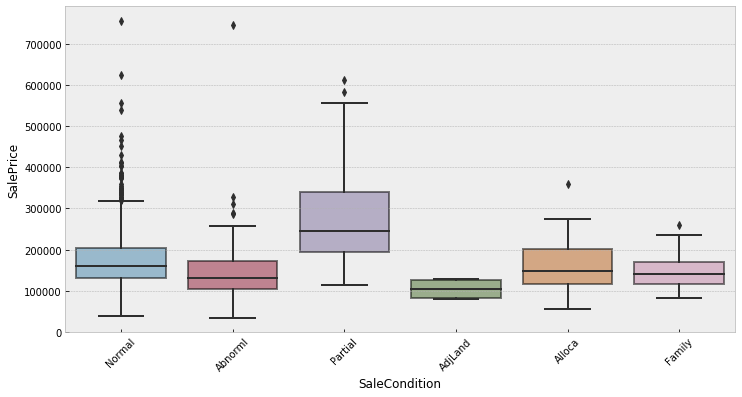

In [143]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x='SaleCondition',y='SalePrice',data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)


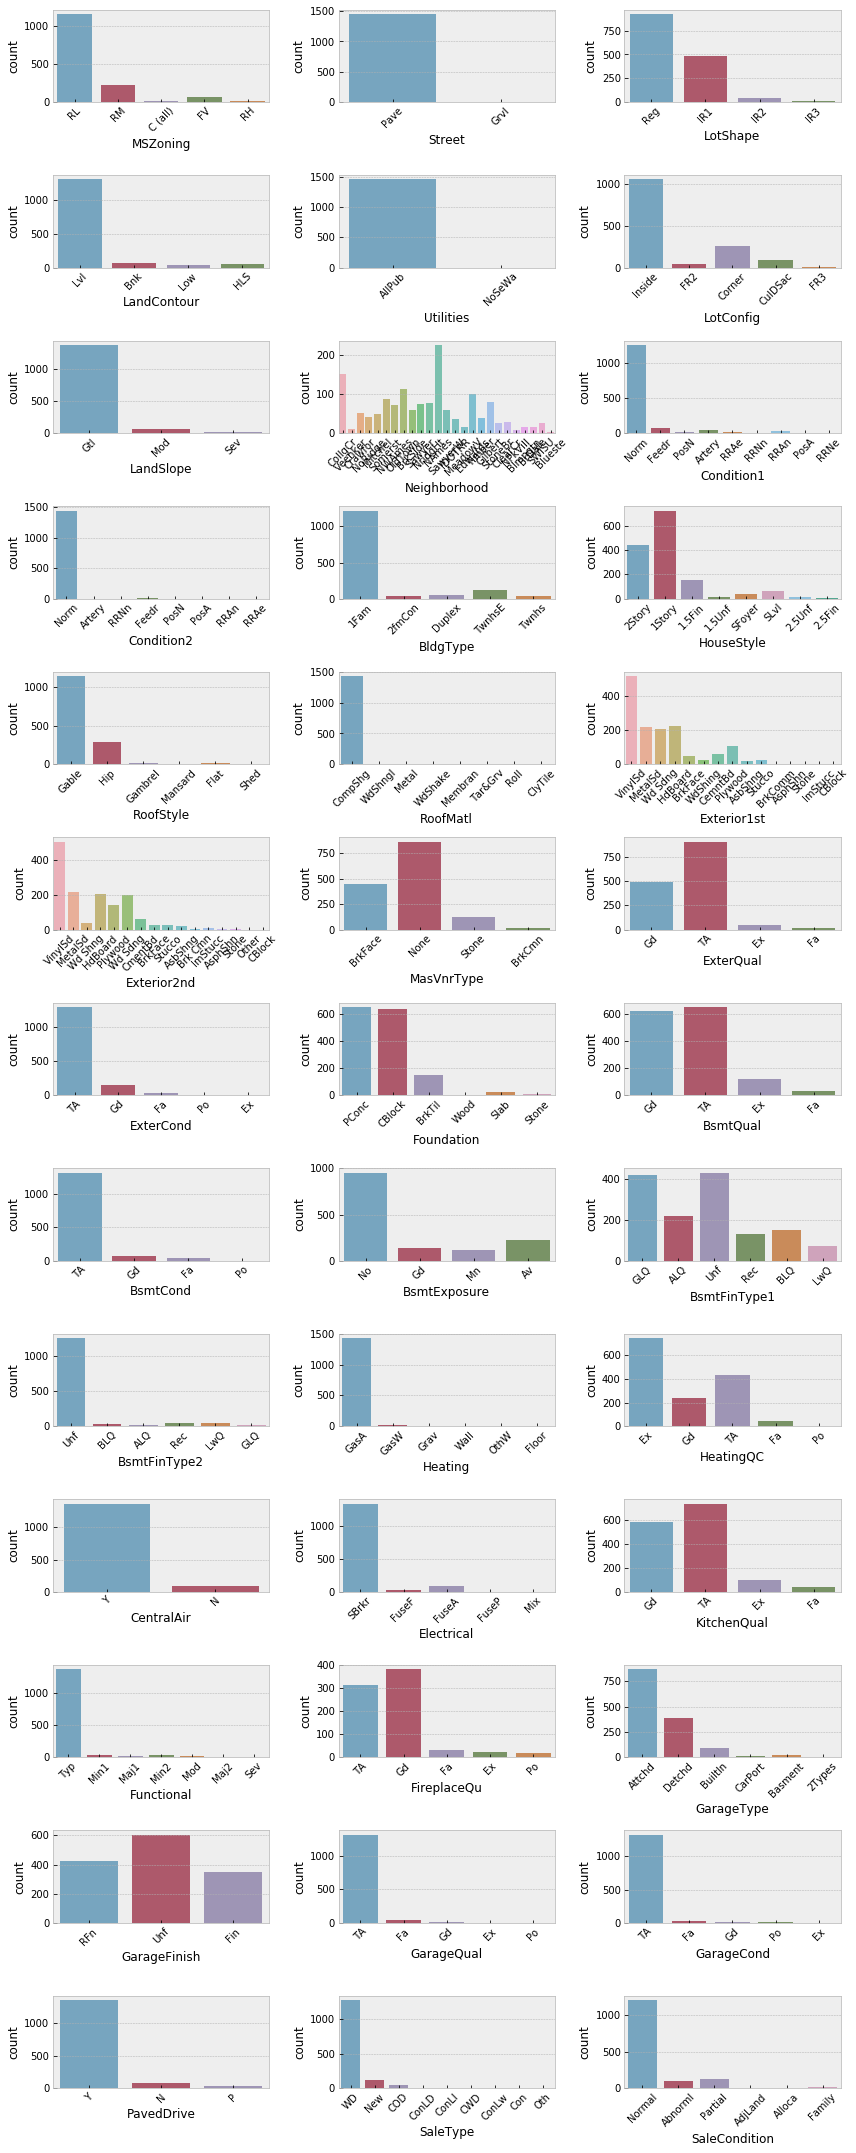

In [148]:
# Look at every distribution 

fig, axes = plt.subplots(round(len(df_not_num.columns)/3), 3 , figsize = (12,30))
for i, ax in enumerate(fig.axes): 
    if i < len(df_not_num.columns): 
          ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=45)
          sns.countplot(x=df_not_num.columns[i],alpha=0.7, data=df_not_num , ax=ax)

fig.tight_layout()